# 导入包

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'       #显示多行
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline     
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # 显示完整的列
pd.set_option('display.max_rows', None) # 显示完整的行
pd.set_option('display.expand_frame_repr', False) # 设置不折叠数据
pd.set_option('display.max_colwidth', 100)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree #导入需要的模块

from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import mean_squared_error
import math

def RMSE(model,x,y):
    return math.sqrt(mean_squared_error(y, model.predict(x)))
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from xgboost.sklearn import XGBClassifier as XGB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.svm import LinearSVC as LSVC            
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier  as KNN
from sklearn.naive_bayes import GaussianNB  as GNB
from sklearn.linear_model import Perceptron  as P
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.tree import DecisionTreeClassifier  as DTC
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.ensemble import  AdaBoostClassifier as ABC
from sklearn.neural_network import MLPClassifier as MLP

# 导入数据

In [2]:
train_voice=pd.read_excel('附件1语音业务用户满意度数据.xlsx', nrows=20)
train_network=pd.read_excel('附件2上网业务用户满意度数据.xlsx', nrows=20)
# test_voice=pd.read_excel('附件3语音业务用户满意度预测数据.xlsx')
# test_network=pd.read_excel('附件4上网业务用户满意度预测数据.xlsx')

# submission_voice = pd.read_excel('初赛赛题 2022年MathorCup大数据竞赛/2022年MathorCup大数据竞赛-赛道B初赛/result.xlsx',sheet_name='语音')
# submission_network = pd.read_excel('初赛赛题 2022年MathorCup大数据竞赛/2022年MathorCup大数据竞赛-赛道B初赛/result.xlsx',sheet_name='上网')

# columns_meaning_voice=pd.read_excel('初赛赛题 2022年MathorCup大数据竞赛/2022年MathorCup大数据竞赛-赛道B初赛/附件5附件1、2、3、4的字段说明.xlsx',sheet_name='语音打分数据字段说明')
# columns_meaning_network=pd.read_excel('初赛赛题 2022年MathorCup大数据竞赛/2022年MathorCup大数据竞赛-赛道B初赛/附件5附件1、2、3、4的字段说明.xlsx',sheet_name='上网打分数据字段说明')

# columns_meaning_voice=columns_meaning_voice[:50]
# columns_meaning_network=columns_meaning_network[:120]

columns_voice_y = train_voice.columns[1:5]
columns_voice_x = train_voice.columns[5:]

columns_network_y = train_network.columns[1:5]
columns_network_x = train_network.columns[5:]

# EDA

In [3]:
# train_voice.shape,train_network.shape,test_voice.shape,test_network.shape,submission_voice.shape,submission_network.shape
# columns_meaning_voice.shape,columns_meaning_network.shape

# 数据预处理

In [4]:
train_voice['是否遇到过网络问题']=train_voice['是否遇到过网络问题'].map({2:0,1:1})

for i in range(1,8):
    train_voice[columns_voice_x[i]]=train_voice[columns_voice_x[i]].map({-1:0,i:1})

train_voice[columns_voice_x[8]]=train_voice[columns_voice_x[8]].map({-1:0,98:1})
    
for i in range(1,7):
    train_voice[columns_voice_x[i+9]]=train_voice[columns_voice_x[i+9]].map({-1:0,i:1})
    
train_voice[columns_voice_x[16]]=train_voice[columns_voice_x[16]].map({-1:0,98:1})

for i in range(18,25):
    train_voice[columns_voice_x[i]]=pd.cut(train_voice[columns_voice_x[i]],[-1,0.5,1000000],labels=[0,1])
                
train_voice[columns_voice_x[25]]=train_voice[columns_voice_x[25]].map({'4G':0,'5G':1})
                
train_voice[columns_voice_x[26]]=train_voice[columns_voice_x[26]].map({'VOLTE':1, 'EPSFB':2, 'CSFB':3, 'VONR':4, 'GSM':5, 'VoLTE':1})
                
train_voice[columns_voice_x[27]]=train_voice[columns_voice_x[27]].map({'是':1})
train_voice[columns_voice_x[28]]=train_voice[columns_voice_x[28]].map({'是':1})
            
train_voice[columns_voice_x[29]]=pd.cut(train_voice[columns_voice_x[29]],[-1,0.5,1000000],labels=[0,1])
train_voice[columns_voice_x[30]]=pd.cut(train_voice[columns_voice_x[30]],[-1,0.5,1000000],labels=[0,1])
            
train_voice[columns_voice_x[31]]=train_voice[columns_voice_x[31]].map({'是':0,'否':1})

train_voice[columns_voice_x[32]]=pd.cut(train_voice[columns_voice_x[32]],[-1,0.5,1000000],labels=[0,1])
train_voice[columns_voice_x[33]]=pd.cut(train_voice[columns_voice_x[33]],[-1,0.5,1000000],labels=[0,1])
train_voice[columns_voice_x[35]]=pd.cut(train_voice[columns_voice_x[35]],[-1,0.5,1000000],labels=[0,1])
            
train_voice[columns_voice_x[36]]=train_voice[columns_voice_x[36]].map({'苹果':1,'华为':2,'小米科技':3,'步步高':4,'欧珀':5,'三星':6,'realme':6,0:6,
                                    '万普拉斯':6,'锤子':6,'万普':6,'联通':6,
                                    '中邮通信':6,'其他':6,'中国移动':6,'中兴':6,
                                    '魅族':6,'黑鲨':6,'联想':6,'智媄互联':6,
                                    '海信':6,'摩托罗拉':6,'乐视移动':6,'天宇朗通':6,
                                    '奇酷':6,'上海中兴易联通讯股份有限公司':6,'诺基亚':6})

train_voice[columns_voice_x[40]]=pd.cut(train_voice[columns_voice_x[40]],[-1,0.5,1000000],labels=[0,1])
train_voice[columns_voice_x[42]]=pd.cut(train_voice[columns_voice_x[42]],[-1,0.5,1000000],labels=[0,1])
train_voice[columns_voice_x[44]]=pd.cut(train_voice[columns_voice_x[44]],[-1,0.5,1000000],labels=[0,1])

train_voice[columns_voice_x[45]]=train_voice[columns_voice_x[45]].map({'否':0,'是':1})
train_voice[columns_voice_x[46]]=train_voice[columns_voice_x[46]].map({'否':0,'是':1})
train_voice[columns_voice_x[47]]=train_voice[columns_voice_x[47]].map({'三星':1, '银卡':2, '二星':3, '一星':4, '金卡':5, '白金卡':6, '未评级':7, '准星':8, '钻石卡':9})
            
train_voice[columns_voice_x[48]]=pd.cut(train_voice[columns_voice_x[48]],[-1,0.5,1000000],labels=[0,1])
train_voice[columns_voice_x[49]]=pd.cut(train_voice[columns_voice_x[49]],[-1,0.5,1000000],labels=[0,1]) 

for i in columns_voice_x:
    train_voice[columns_voice_x]=train_voice[columns_voice_x].fillna(0)
    
train_voice=train_voice.drop(columns=['用户id','用户描述','用户描述.1','终端品牌类型'],axis=1)

In [5]:
def apply_colour(value):
    if abs(value) > 0.1:
        colour = '#FF0000' #Red
    else:
        colour = '#008000' #Green
    return 'color: %s' % colour

corr_voice= train_voice.corr(method='kendall').iloc[4:,[0,1,2,3]]
train_voice.corr(method='kendall').iloc[4:,[0,1,2,3]].style.applymap(apply_colour)

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性
是否遇到过网络问题,-0.529316,-0.663497,-0.661267,-0.709575
居民小区,-0.463151,-0.249889,-0.283400,-0.439261
办公室,-0.354169,-0.448435,-0.527375,-0.545119
高校,-0.103429,0.018858,0.000000,-0.166382
商业街,-0.270501,-0.246598,-0.235529,-0.261892
地铁,-0.259230,-0.267148,-0.327693,-0.392839
农村,-0.245951,-0.233186,-0.223464,-0.246183
高铁,-0.442711,-0.430498,-0.357542,-0.369274
其他，请注明,nan,nan,nan,nan
手机没有信号,-0.265627,-0.179374,-0.187710,-0.298936


In [6]:
for i in columns_network_x:
    train_network[i]=train_network[i].fillna(0)

for i in range(7):
    train_network[columns_network_x[i]]=train_network[columns_network_x[i]].map({-1:0,i+1:1})
    
train_network[columns_network_x[7]]=train_network[columns_network_x[7]].map({-1:0,98:1})

for i in range(9,13):
    train_network[columns_network_x[i]]=train_network[columns_network_x[i]].map({-1:0,i+1-9:1})
    
train_network[columns_network_x[13]]=train_network[columns_network_x[13]].map({-1:0,98:1})   

for i in range(15,20):
    train_network[columns_network_x[i]]=train_network[columns_network_x[i]].map({-1:0,i+1-15:1})
    
train_network[columns_network_x[20]]=train_network[columns_network_x[20]].map({-1:0,98:1}) 

for i in range(22,31):
    train_network[columns_network_x[i]]=train_network[columns_network_x[i]].map({-1:0,i+1-22:1})
    
train_network[columns_network_x[31]]=train_network[columns_network_x[31]].map({-1:0,98:1}) 
train_network[columns_network_x[33]]=train_network[columns_network_x[33]].map({-1:0,99:1}) 

for i in range(34,44):
    train_network[columns_network_x[i]]=train_network[columns_network_x[i]].map({-1:0,i+1-34:1})
    
train_network[columns_network_x[44]]=train_network[columns_network_x[44]].map({-1:0,98:1}) 
train_network[columns_network_x[46]]=train_network[columns_network_x[46]].map({-1:0,99:1}) 

for i in range(47,55):
    train_network[columns_network_x[i]]=train_network[columns_network_x[i]].map({-1:0,i+1-47:1})
train_network[columns_network_x[55]]=train_network[columns_network_x[55]].map({-1:0,98:1}) 
train_network[columns_network_x[57]]=train_network[columns_network_x[57]].map({-1:0,99:1}) 
    

#按0分箱
columns_0=[58,59,60,61,62,63,66,67,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,110]
for i in columns_0:
    train_network[columns_network_x[i]]=pd.cut(train_network[columns_network_x[i]],[-1,0.5,1000000],labels=[0,1])

#按是否类别
columns_is_or_not=[64,65,68,69,104,106,107,108]
for i in columns_is_or_not:
    train_network[columns_network_x[i]]=train_network[columns_network_x[i]].map({'否':0, '是':1}) 

train_network[columns_network_x[70]]=pd.cut(train_network[columns_network_x[70]],[0,20,30,40,50,60,120],labels=[1,2,3,4,5,6])
train_network[columns_network_x[71]]=train_network[columns_network_x[71]].map({'男':1, '女':2, '性别不详':3}) 
train_network[columns_network_x[99]]=train_network[columns_network_x[99]].map({'手机':1, '其它':2, '其他可穿戴':2, '平板电脑':2}) 
train_network[columns_network_x[101]]=train_network[columns_network_x[101]].map({'5G终端':3, '4G终端':2, '2/3G终端':1}) 
train_network[columns_network_x[102]]=train_network[columns_network_x[102]].map({'苹果':1,'华为':2,'小米科技':3,'步步高':4,'欧珀':5,'三星':6,'realme':6,0:6,
                                    '万普拉斯':6,'锤子':6,'万普':6,'联通':6,
                                    '中邮通信':6,'其他':6,'中国移动':6,'中兴':6,
                                    '魅族':6,'黑鲨':6,'联想':6,'智媄互联':6,
                                    '海信':6,'摩托罗拉':6,'乐视移动':6,'天宇朗通':6,
                                    '奇酷':6,'上海中兴易联通讯股份有限公司':6,'诺基亚':6,'华硕':6,
                                    '甄十信息科技（上海）有限公司':6,'维图':6, '捷开通讯科技':6, 'TD':6, 
                                    '中国电信':6, '北京珠穆朗玛移动通信有限公司':6, '欧博信':6,'飞利浦':6, '酷比':6, '索尼爱立信':6, '金立':6})
train_network[columns_network_x[105]]=pd.cut(train_network[columns_network_x[105]],[0,10,20,30,50,100,10000],labels=[1,2,3,4,5,6])
train_network[columns_network_x[109]]=train_network[columns_network_x[109]].map({'城区二分公司':1, '城区三分公司':2, '城区一分公司':3, '不详':4, '通州分公司':5,
                                                                             '大兴分公司':6, '昌平分公司':7, '顺义分公司':8,'房山分公司':9, '密云分公司':10, 
                                                                             '怀柔分公司':11, '平谷分公司':12, '延庆分公司':13}) 
train_network[columns_network_x[119]]=train_network[columns_network_x[119]].map({'三星':1, '银卡':2, '二星':3, '一星':4, '金卡':5, '白金卡':6, '未评级':7, '准星':8, '钻石卡':9})

train_network=train_network.drop(columns=['用户','场景备注数据','现象备注数据','APP大类备注','APP小类视频备注','APP小类游戏备注','APP小类上网备注',
                                        '操作系统','终端品牌类型','畅享套餐名称','码号资源-激活时间','码号资源-发卡时间'],axis=1)
  

In [7]:
corr_network = train_network.corr(method='kendall').iloc[4:,[0,1,2,3]]
train_network.corr(method='kendall').iloc[4:,[0,1,2,3]].style.applymap(apply_colour)

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性
居民小区,-0.145297,-0.186276,-0.182998,-0.129249
办公室,-0.450564,-0.347208,-0.457571,-0.364998
高校,0.063727,0.038808,0.038125,0.038014
商业街,-0.449272,-0.417181,-0.495620,-0.494186
地铁,-0.374634,-0.205960,-0.342415,-0.411261
农村,-0.095590,-0.106721,-0.247810,0.009504
高铁,-0.318633,-0.362204,-0.355830,-0.354800
其他，请注明,-0.280397,-0.258717,-0.165207,-0.152057
网络信号差/没有信号,-0.130657,-0.054604,-0.137940,0.076412
显示有信号上不了网,-0.272559,-0.146453,-0.247786,-0.215189


# 特征选择

### 语音

In [8]:
train_voice = train_voice.astype('float32')
train_network = train_network.astype('float32')
train_network.fillna(0, inplace=True)

In [9]:
y1 = train_voice.iloc[:,:4]
x1 = train_voice.iloc[:,4:]

y2 = train_network.iloc[:,:4]
x2 = train_network.iloc[:,4:]

ros = RandomOverSampler(random_state=420)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=420)
y1_1_train, y1_2_train, y1_3_train, y1_4_train = y1_train.iloc[:, 0], y1_train.iloc[:, 1], y1_train.iloc[:, 2], y1_train.iloc[:, 3]
y1_1_test, y1_2_test, y1_3_test, y1_4_test = y1_test.iloc[:, 0], y1_test.iloc[:, 1], y1_test.iloc[:, 2], y1_test.iloc[:, 3]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2,random_state=420)
y2_1_train, y2_2_train, y2_3_train, y2_4_train = y2_train.iloc[:, 0], y2_train.iloc[:, 1], y2_train.iloc[:, 2], y2_train.iloc[:, 3]
y2_1_test, y2_2_test, y2_3_test, y2_4_test = y2_test.iloc[:, 0], y2_test.iloc[:, 1], y2_test.iloc[:, 2], y2_test.iloc[:, 3]

le = LabelEncoder()
for i in [1,2]:
    for j in [1,2,3,4]:
        for s in ['train','test']:
            exec('y%s_%s_%s=le.fit_transform(y%s_%s_%s)'%(i,j,s,i,j,s))
            
for i in [1,2,3,4]:
    exec('x1_%s_train_balance, y1_%s_train_balance = ros.fit_resample(x1_train, y1_%s_train)'%(i,i,i))


for i in [1,2,3,4]:
    exec('x2_%s_train_balance, y2_%s_train_balance = ros.fit_resample(x2_train, y2_%s_train)'%(i,i,i))



In [10]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

clf11 = RandomForestClassifier()
clf11 = clf11.fit(x1_1_train_balance,y1_1_train_balance) #用训练集数据训练模型
#result11 = clf11.score(x1_test,y1_1_test) #对我们训练的模型精度进行打分
result11 = RMSE(clf11,x1_test,y1_1_test)#对我们训练的模型精度进行打分
importance11 = list(clf11.feature_importances_)

clf12 = RandomForestClassifier()
clf12 = clf12.fit(x1_2_train_balance,y1_2_train_balance) #用训练集数据训练模型
#result12 = clf12.score(x1_test,y1_2_test) #对我们训练的模型精度进行打分
result12 = RMSE(clf12,x1_test,y1_2_test) #对我们训练的模型精度进行打分
importance12 = list(clf12.feature_importances_)

clf13 = RandomForestClassifier()
clf13 = clf13.fit(x1_3_train_balance,y1_3_train_balance)#用训练集数据训练模型
#result13 = clf13.score(x1_test,y1_3_test) #对我们训练的模型精度进行打分
result13 = RMSE(clf13,x1_test,y1_3_test) #对我们训练的模型精度进行打分
importance13 = list(clf13.feature_importances_)

clf14 = RandomForestClassifier()
clf14 = clf14.fit(x1_4_train_balance,y1_4_train_balance) #用训练集数据训练模型
#result14 = clf14.score(x1_test,y1_4_test) #对我们训练的模型精度进行打分
result14 = RMSE(clf14,x1_test,y1_4_test) #对我们训练的模型精度进行打分
importance14 = list(clf14.feature_importances_)
result11, result12, result13, result14

(4.8218253804964775,
 4.2130748865881795,
 3.6742346141747673,
 2.5495097567963922)

In [11]:
feature_list1 = list(train_voice.columns)[4:]
importance1 = [i for i in (importance11 + importance12 + importance13 + importance14)]
feature_importance1 = [(feature, round(importance, 3)) for feature, importance in zip(feature_list1, importance1)]
feature_importance1= sorted(feature_importance1, key=lambda x: x[1], reverse=True)
feature_importance1

[('GPRS总流量（KB）', 0.088),
 ('语音通话-时长（分钟）', 0.071),
 ('前3月MOU', 0.068),
 ('当月MOU', 0.061),
 ('当月ARPU', 0.058),
 ('客户星级标识', 0.053),
 ('通话过程中一方听不见', 0.052),
 ('终端品牌', 0.049),
 ('高铁', 0.048),
 ('手机没有信号', 0.042),
 ('商业街', 0.038),
 ('地铁', 0.038),
 ('办公室', 0.034),
 ('通话过程中突然中断', 0.033),
 ('有信号无法拨通', 0.028),
 ('居民小区', 0.026),
 ('农村', 0.026),
 ('是否5G网络客户', 0.024),
 ('4\\5G用户', 0.023),
 ('当月欠费金额', 0.023),
 ('是否去过营业厅', 0.022),
 ('前第3个月欠费金额', 0.022),
 ('通话中有杂音、听不清、断断续续', 0.021),
 ('高校', 0.02),
 ('语音方式', 0.013),
 ('是否实名登记用户', 0.011),
 ('是否遇到过网络问题', 0.004),
 ('套外流量费（元）', 0.002),
 ('mos质差次数', 0.001),
 ('套外流量（MB）', 0.001),
 ('GPRS-国内漫游-流量（KB）', 0.001),
 ('其他，请注明', 0.0),
 ('串线', 0.0),
 ('其他，请注明.1', 0.0),
 ('脱网次数', 0.0),
 ('未接通掉话次数', 0.0),
 ('重定向次数', 0.0),
 ('重定向驻留时长', 0.0),
 ('家宽投诉', 0.0),
 ('资费投诉', 0.0),
 ('是否关怀用户', 0.0),
 ('ARPU（家庭宽带）', 0.0),
 ('是否4G网络客户（本地剔除物联网）', 0.0),
 ('外省语音占比', 0.0),
 ('省际漫游-时长（分钟）', 0.0),
 ('前3月ARPU', 0.0),
 ('外省流量占比', 0.0)]

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 47 artists>

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Variable')

Text(0.5, 1.0, 'Variable Importances')

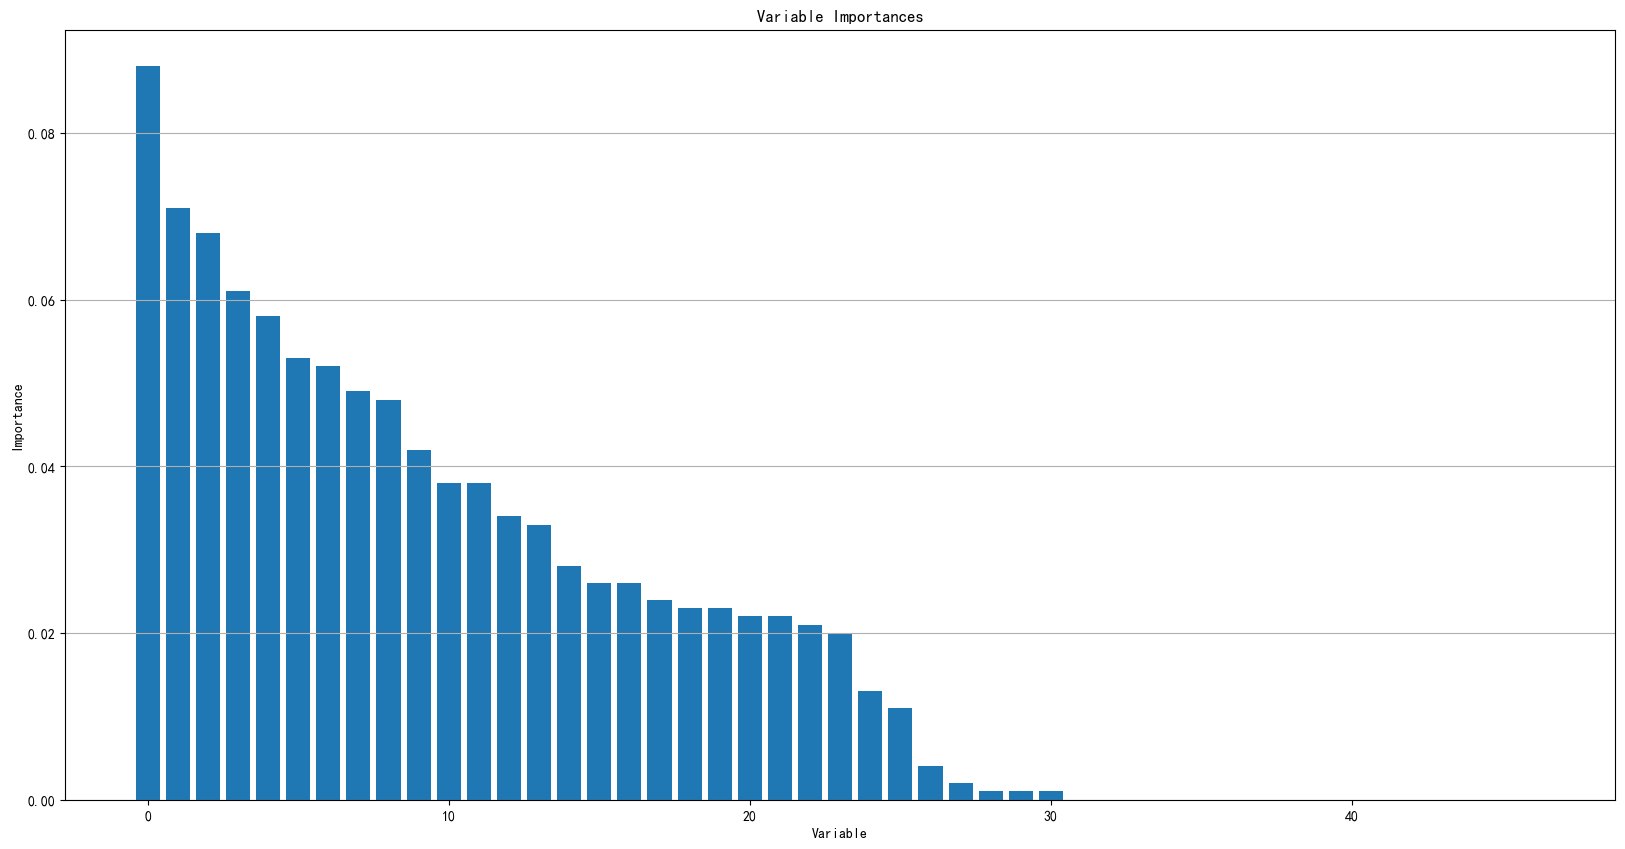

In [12]:
x1_values = list(range(len(feature_importance1)))
plt.figure(figsize=(20, 10), dpi=100)
plt.bar(range(len(x1_values)), pd.DataFrame(feature_importance1).iloc[:,1], orientation='vertical')
#plt.xticks(x1_values, feature_list1, rotation=270)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.grid(axis='y')
plt.savefig('d1.jpg')
plt.show()

In [13]:
def permutation_importances(model, X, y, metric):
    baseline = metric(model,X, y)
    imp = []
    for col in X.columns:
        save = X[col].copy()
        X[col] = np.random.permutation(X[col])
        m = metric(model,X, y)
        X[col] = save
        imp.append(baseline - m)
    return np.array(imp)

In [14]:
from sklearn.metrics import accuracy_score
im1=abs(permutation_importances(clf11,x1_test,y1_1_test,RMSE))
im2=abs(permutation_importances(clf12,x1_test,y1_2_test,RMSE))
im3=abs(permutation_importances(clf13,x1_test,y1_3_test,RMSE))
im4=abs(permutation_importances(clf14,x1_test,y1_4_test,RMSE))
feature_list1 = list(train_voice.columns)[4:]
importance2 = [i for i in (im1+im2+im3+im4)]
feature_importance = [(feature, round(importance, 3)) for feature, importance in zip(feature_list1, (im1+im2+im3+im4))]
feature_importance=sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('农村', 0.974),
 ('GPRS总流量（KB）', 0.746),
 ('高铁', 0.55),
 ('办公室', 0.428),
 ('语音通话-时长（分钟）', 0.424),
 ('是否遇到过网络问题', 0.0),
 ('居民小区', 0.0),
 ('高校', 0.0),
 ('商业街', 0.0),
 ('地铁', 0.0),
 ('其他，请注明', 0.0),
 ('手机没有信号', 0.0),
 ('有信号无法拨通', 0.0),
 ('通话过程中突然中断', 0.0),
 ('通话中有杂音、听不清、断断续续', 0.0),
 ('串线', 0.0),
 ('通话过程中一方听不见', 0.0),
 ('其他，请注明.1', 0.0),
 ('脱网次数', 0.0),
 ('mos质差次数', 0.0),
 ('未接通掉话次数', 0.0),
 ('重定向次数', 0.0),
 ('重定向驻留时长', 0.0),
 ('家宽投诉', 0.0),
 ('资费投诉', 0.0),
 ('4\\5G用户', 0.0),
 ('语音方式', 0.0),
 ('是否关怀用户', 0.0),
 ('是否去过营业厅', 0.0),
 ('ARPU（家庭宽带）', 0.0),
 ('套外流量（MB）', 0.0),
 ('是否4G网络客户（本地剔除物联网）', 0.0),
 ('套外流量费（元）', 0.0),
 ('外省语音占比', 0.0),
 ('省际漫游-时长（分钟）', 0.0),
 ('终端品牌', 0.0),
 ('当月ARPU', 0.0),
 ('当月MOU', 0.0),
 ('前3月ARPU', 0.0),
 ('前3月MOU', 0.0),
 ('外省流量占比', 0.0),
 ('GPRS-国内漫游-流量（KB）', 0.0),
 ('是否5G网络客户', 0.0),
 ('是否实名登记用户', 0.0),
 ('客户星级标识', 0.0),
 ('当月欠费金额', 0.0),
 ('前第3个月欠费金额', 0.0)]

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 47 artists>

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Variable')

Text(0.5, 1.0, 'Variable Importances')

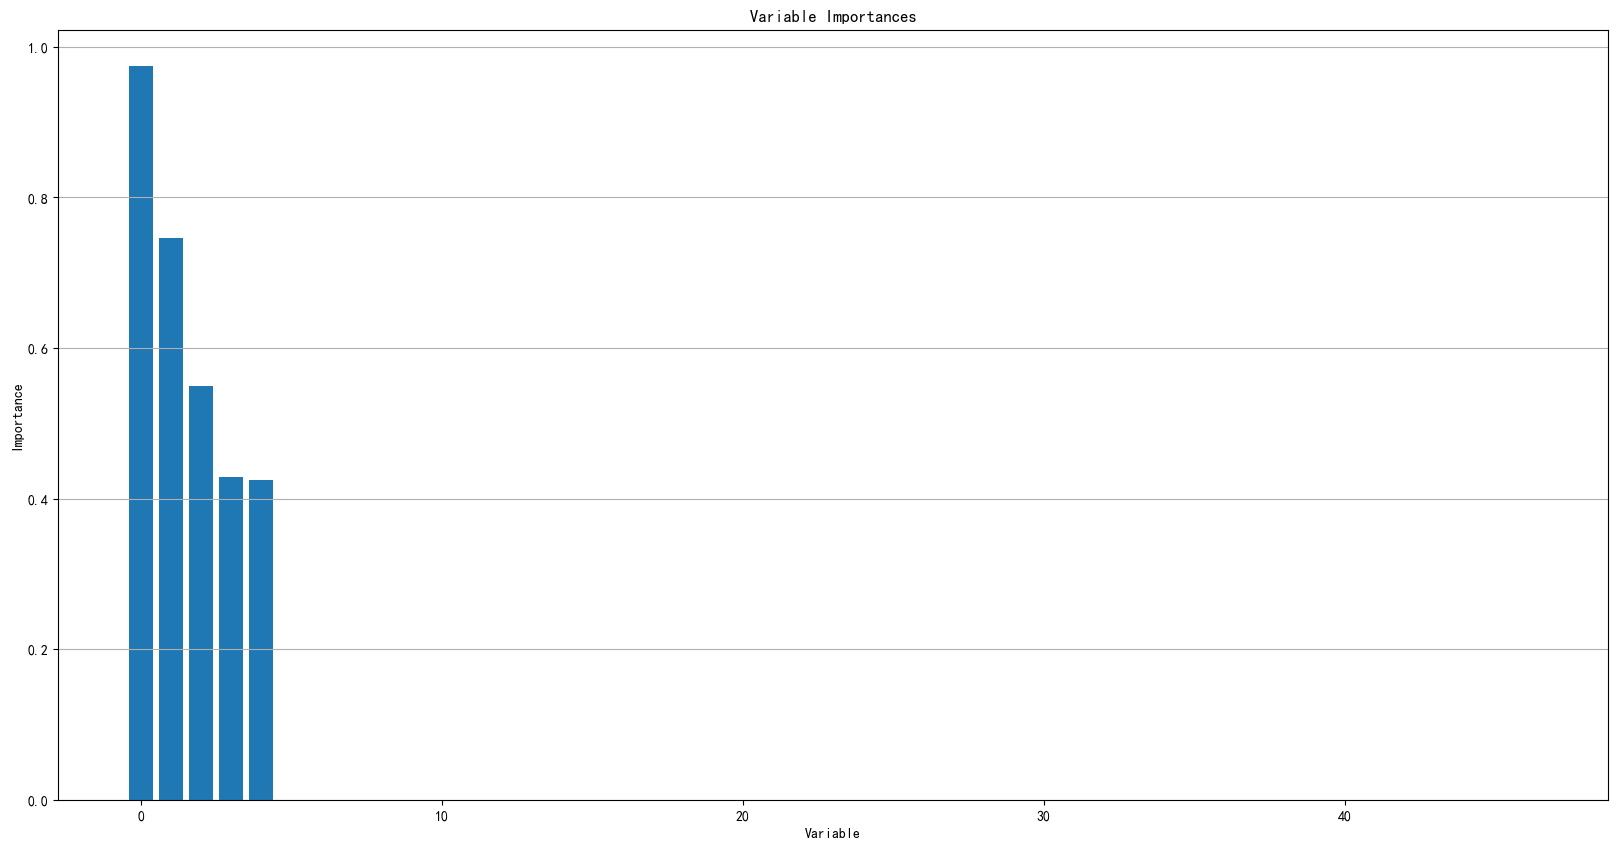

In [15]:
x1_values = list(range(len(feature_importance)))
plt.figure(figsize=(20, 10), dpi=100)
plt.bar(range(len(x1_values)), pd.DataFrame(feature_importance).iloc[:,1], orientation='vertical')
#plt.xticks(x1_values, feature_list1, rotation=270)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.grid(axis='y')
plt.savefig('d1.jpg')
plt.show()

In [16]:
voice_list = []
for i in corr_voice.T.columns:
    if(abs(corr_voice.T[i].mean())>0.1 or (importance1[list(corr_voice.T.columns).index(i)] > 0.015 and  importance2[list(corr_voice.T.columns).index(i)] > 0.076)):i

'是否遇到过网络问题'

'居民小区'

'办公室'

'商业街'

'地铁'

'农村'

'高铁'

'手机没有信号'

'有信号无法拨通'

'通话过程中突然中断'

'通话中有杂音、听不清、断断续续'

'通话过程中一方听不见'

'4\\5G用户'

'是否去过营业厅'

'语音通话-时长（分钟）'

'终端品牌'

'当月ARPU'

'当月MOU'

'前3月MOU'

'GPRS总流量（KB）'

'是否5G网络客户'

### 上网

In [17]:
clf21 = RandomForestClassifier()
clf21 = clf21.fit(x2_train,y2_1_train) #用训练集数据训练模型
result21 = clf21.score(x2_test,y2_1_test) #对我们训练的模型精度进行打分
importance21 = list(clf21.feature_importances_)

clf22 = RandomForestClassifier()
clf22 = clf22.fit(x2_train,y2_2_train) #用训练集数据训练模型
result22 = clf22.score(x2_test,y2_2_test) #对我们训练的模型精度进行打分
importance22 = list(clf22.feature_importances_)

clf23 = RandomForestClassifier()
clf23 = clf23.fit(x2_train,y2_3_train) #用训练集数据训练模型
result23 = clf23.score(x2_test,y2_3_test) #对我们训练的模型精度进行打分
importance23 = list(clf23.feature_importances_)

clf24 =RandomForestClassifier()
clf24 = clf24.fit(x2_train,y2_4_train) #用训练集数据训练模型
result24 = clf24.score(x2_test,y2_4_test) #对我们训练的模型精度进行打分
importance24 = list(clf24.feature_importances_)
result21, result22, result23, result24

(0.0, 0.0, 0.0, 0.0)

In [18]:
feature_list2 = list(train_network.columns)[4:]
importance2 = [i for i in (importance21 + importance22 + importance23 + importance24)]
feature_importance2 = [(feature, round(importance, 3)) for feature, importance in zip(feature_list2, importance2)]
feature_importance2 = sorted(feature_importance2, key=lambda x: x[1], reverse=True)
feature_importance2

[('本年累计消费（元）', 0.048),
 ('当月MOU', 0.047),
 ('近3个月平均消费（剔除通信账户支付）', 0.046),
 ('重定向次数', 0.045),
 ('年龄', 0.035),
 ('主套餐档位', 0.033),
 ('当月GPRS资源使用量（GB）', 0.032),
 ('抖音使用流量（MB）', 0.029),
 ('近3个月平均消费（元）', 0.029),
 ('客户星级标识', 0.026),
 ('2G驻留时长', 0.025),
 ('当月高频通信分公司', 0.024),
 ('地铁', 0.022),
 ('是否校园套餐用户', 0.02),
 ('微信质差次数', 0.018),
 ('滴滴出行使用流量', 0.018),
 ('是否5G网络客户', 0.018),
 ('性别', 0.017),
 ('蜻蜓FMAPP使用流量', 0.017),
 ('终端品牌', 0.017),
 ('小视频系APP流量', 0.016),
 ('手机上网速度慢', 0.015),
 ('上网质差次数', 0.015),
 ('居民小区', 0.014),
 ('显示有信号上不了网', 0.014),
 ('脱网次数', 0.014),
 ('快手使用流量', 0.013),
 ('游戏类应用流量', 0.013),
 ('终端制式', 0.013),
 ('商业街', 0.012),
 ('王者荣耀使用天数', 0.012),
 ('农村', 0.011),
 ('手机支付较慢', 0.011),
 ('天猫使用流量', 0.011),
 ('畅享套餐档位', 0.011),
 ('办公室', 0.01),
 ('看视频卡顿', 0.01),
 ('阿里系APP流量', 0.01),
 ('视频类应用流量', 0.01),
 ('新浪微博', 0.009),
 ('王者荣耀使用次数', 0.009),
 ('游戏类APP使用天数', 0.009),
 ('腾讯视频使用流量', 0.009),
 ('音乐类应用流量', 0.009),
 ('校园卡校园合约捆绑用户', 0.009),
 ('其他，请注明', 0.008),
 ('上网过程中网络时断时续或时快时慢', 0.008),
 ('其他，请注明.1', 0.0

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 109 artists>

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Variable')

Text(0.5, 1.0, 'Variable Importances')

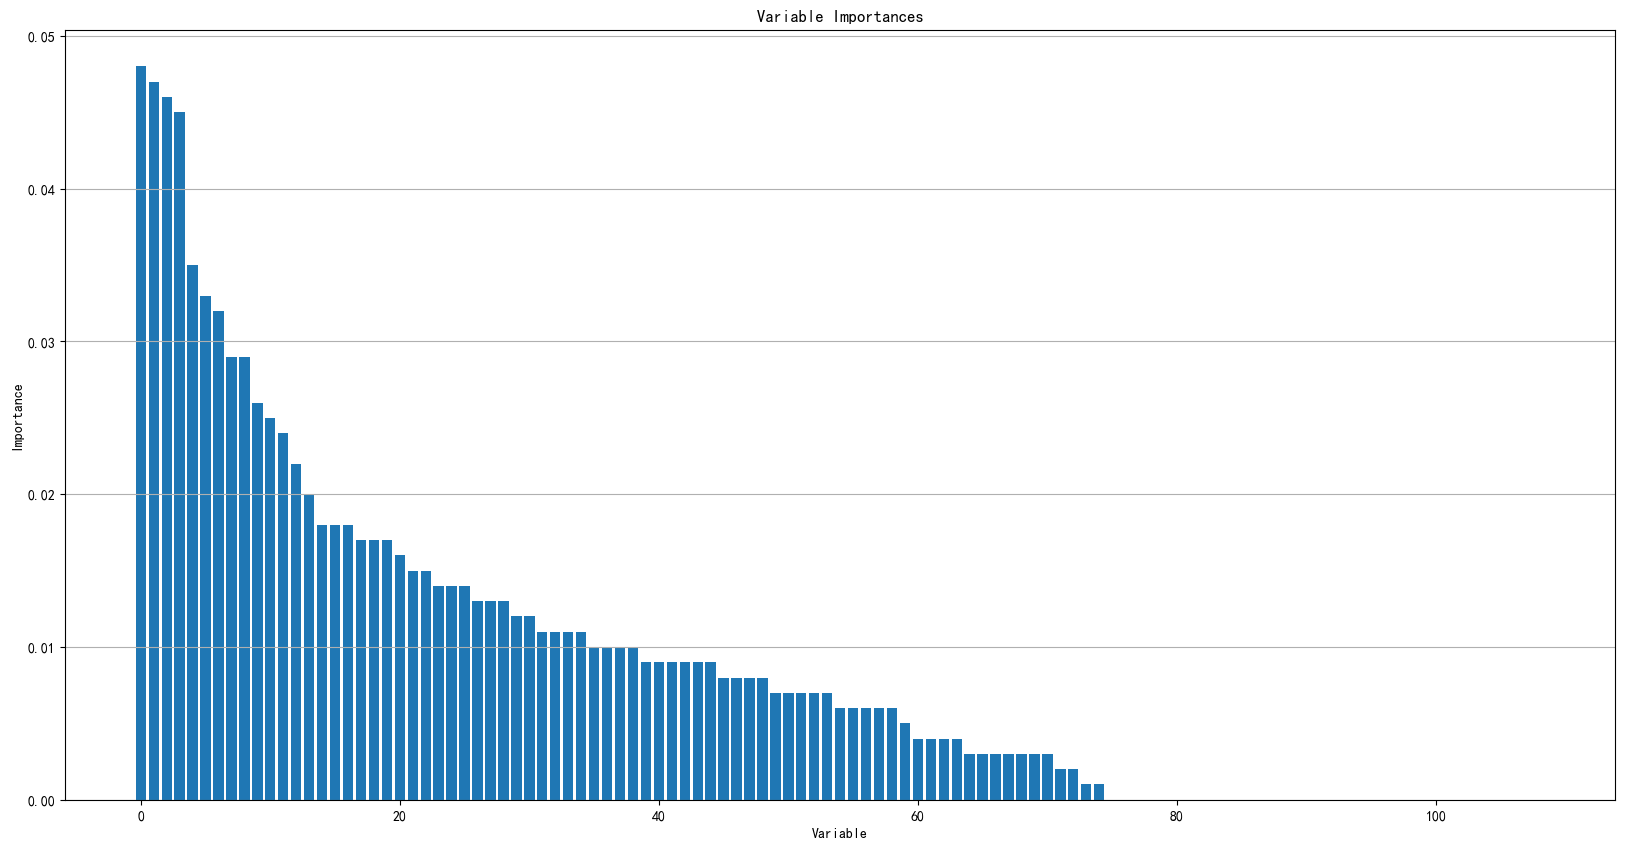

In [19]:
x2_values = list(range(len(feature_importance2)))
plt.figure(figsize=(20, 10), dpi=100)
plt.bar(range(len(x2_values)), pd.DataFrame(feature_importance2).iloc[:,1], orientation='vertical')
#plt.xticks(x1_values, feature_list1, rotation=270)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.grid(axis='y')
plt.savefig('d1.jpg')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
im1=abs(permutation_importances(clf21,x2_test,y2_1_test,RMSE))
im2=abs(permutation_importances(clf22,x2_test,y2_2_test,RMSE))
im3=abs(permutation_importances(clf23,x2_test,y2_3_test,RMSE))
im4=abs(permutation_importances(clf24,x2_test,y2_4_test,RMSE))
feature_list1 = list(train_network.columns)[4:]
importance2 = [i for i in (im1+im2+im3+im4)]
feature_importance = [(feature, round(importance, 3)) for feature, importance in zip(feature_list1, (im1+im2+im3+im4))]
feature_importance=sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('微信质差次数', 0.956),
 ('2G驻留时长', 0.937),
 ('当月GPRS资源使用量（GB）', 0.702),
 ('办公室', 0.577),
 ('商业街', 0.577),
 ('终端品牌', 0.577),
 ('客户星级标识', 0.577),
 ('本年累计消费（元）', 0.549),
 ('上网过程中网络时断时续或时快时慢', 0.42),
 ('畅享套餐档位', 0.419),
 ('百度', 0.36),
 ('抖音使用流量（MB）', 0.36),
 ('滴滴出行使用流量', 0.36),
 ('近3个月平均消费（剔除通信账户支付）', 0.36),
 ('地铁', 0.342),
 ('手机上网速度慢', 0.342),
 ('打开网页或APP图片慢', 0.342),
 ('邮箱类应用流量', 0.342),
 ('主套餐档位', 0.342),
 ('当月MOU', 0.342),
 ('套外流量费（元）', 0.254),
 ('王者荣耀使用天数', 0.254),
 ('蜻蜓FMAPP使用流量', 0.254),
 ('是否校园套餐用户', 0.254),
 ('重定向次数', 0.139),
 ('近3个月平均消费（元）', 0.071),
 ('居民小区', 0.0),
 ('高校', 0.0),
 ('农村', 0.0),
 ('高铁', 0.0),
 ('其他，请注明', 0.0),
 ('网络信号差/没有信号', 0.0),
 ('显示有信号上不了网', 0.0),
 ('其他，请注明.1', 0.0),
 ('看视频卡顿', 0.0),
 ('打游戏延时大', 0.0),
 ('下载速度慢', 0.0),
 ('手机支付较慢', 0.0),
 ('其他，请注明.2', 0.0),
 ('爱奇艺', 0.0),
 ('优酷', 0.0),
 ('腾讯视频', 0.0),
 ('芒果TV', 0.0),
 ('搜狐视频', 0.0),
 ('抖音', 0.0),
 ('快手', 0.0),
 ('火山', 0.0),
 ('咪咕视频', 0.0),
 ('其他，请注明.3', 0.0),
 ('全部都卡顿', 0.0),
 ('和平精英', 0.0),
 ('王者荣耀', 0.0),
 ('穿越火线'

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 109 artists>

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Variable')

Text(0.5, 1.0, 'Variable Importances')

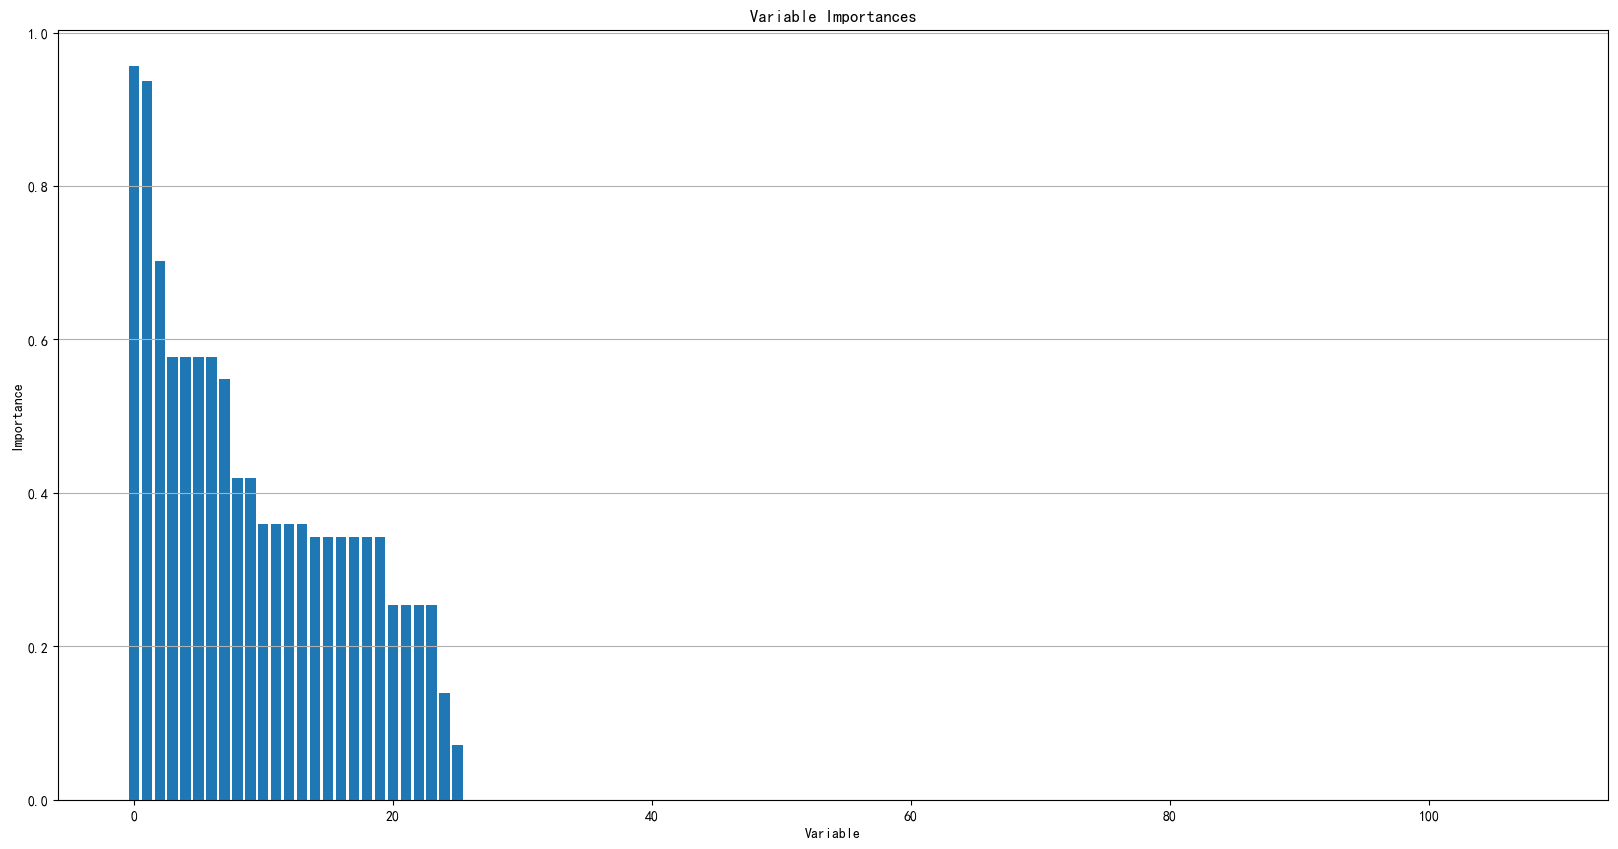

In [21]:
x1_values = list(range(len(feature_importance)))
plt.figure(figsize=(20, 10), dpi=100)
plt.bar(range(len(x1_values)), pd.DataFrame(feature_importance).iloc[:,1], orientation='vertical')
#plt.xticks(x1_values, feature_list1, rotation=270)
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.grid(axis='y')
plt.savefig('d1.jpg')
plt.show()

In [22]:
network_list = []
for i in corr_network.T.columns:
    if (abs(corr_network.T[i].mean()) > 0.1 or (importance1[list(corr_network.T.columns).index(i)] > 0.015 and  importance2[list(corr_network.T.columns).index(i)] > 0.076)):i

'居民小区'

'办公室'

'商业街'

'地铁'

'农村'

'高铁'

'其他，请注明'

'显示有信号上不了网'

'上网过程中网络时断时续或时快时慢'

'手机上网速度慢'

'其他，请注明.1'

'打游戏延时大'

'打开网页或APP图片慢'

'手机支付较慢'

'其他，请注明.2'

'快手'

'其他，请注明.3'

'全部都卡顿'

'其他，请注明.4'

'微信'

'淘宝'

'京东'

'百度'

'新浪微博'

'全部网页或APP都慢'

'是否全月漫游用户'

'性别'

'是否校园套餐用户'

'主套餐档位'

'近3个月平均消费（剔除通信账户支付）'

'近3个月平均消费（元）'

'本年累计消费（元）'

'客户星级标识'

In [23]:
train_voice.shape,train_network.shape

((20, 51), (20, 113))

In [24]:
try:
    train_voice=train_voice.drop(columns=['语音通话-时长（分钟）','当月ARPU','当月MOU','前3月MOU','GPRS总流量（KB）'],axis=1)
    for i in train_voice.columns:
        if(i not in test_voice.columns and i not in train_voice.iloc[:,:5].columns):
            train_voice=train_voice.drop(i,axis=1)
            
    train_network=train_network.drop(columns=['主套餐档位','当月MOU','近3个月平均消费（剔除通信账户支付）','近3个月平均消费（元）','本年累计消费（元）'],axis=1)
    for i in train_network.columns:
        if(i not in test_network.columns and i not in train_network.iloc[:,:5].columns):
            train_network=train_network.drop(i,axis=1)   
except:
    print('并没有完整执行try的内容')

并没有完整执行try的内容


In [25]:
train_voice.shape,train_network.shape
# test_voice.shape,test_network.shape

((20, 46), (20, 113))

In [26]:
y1 = train_voice.iloc[:,:4]
x1_temp = train_voice.iloc[:,4:]

y2 = train_network.iloc[:,:4]
x2_temp = train_network.iloc[:,4:]

from sklearn.preprocessing import OneHotEncoder
x1 = pd.DataFrame([])
for i in x1_temp.columns:
    temp=pd.get_dummies(x1_temp[i])
    for j in range(len(temp.columns)):
        temp1 = pd.DataFrame(temp.iloc[:,[j]].values,columns=['%s_%s'%(i,j)])
        x1=pd.concat([x1,temp1],axis =1)
        
x2 = pd.DataFrame([])
for i in x2_temp.columns:
    temp=pd.get_dummies(x2_temp[i])
    for j in range(len(temp.columns)):
        temp1 = pd.DataFrame(temp.iloc[:,[j]].values,columns=['%s_%s'%(i,j)])
        x2=pd.concat([x2,temp1],axis =1)

ros = RandomOverSampler(random_state=420)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=420)
y1_1_train, y1_2_train, y1_3_train, y1_4_train = y1_train.iloc[:, 0], y1_train.iloc[:, 1], y1_train.iloc[:, 2], y1_train.iloc[:, 3]
y1_1_test, y1_2_test, y1_3_test, y1_4_test = y1_test.iloc[:, 0], y1_test.iloc[:, 1], y1_test.iloc[:, 2], y1_test.iloc[:, 3]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2,random_state=420)
y2_1_train, y2_2_train, y2_3_train, y2_4_train = y2_train.iloc[:, 0], y2_train.iloc[:, 1], y2_train.iloc[:, 2], y2_train.iloc[:, 3]
y2_1_test, y2_2_test, y2_3_test, y2_4_test = y2_test.iloc[:, 0], y2_test.iloc[:, 1], y2_test.iloc[:, 2], y2_test.iloc[:, 3]

le = LabelEncoder()
for i in [1,2]:
    for j in [1,2,3,4]:
        for s in ['train','test']:
            exec('y%s_%s_%s=le.fit_transform(y%s_%s_%s)'%(i,j,s,i,j,s))
            
for i in [1,2,3,4]:
    exec('x1_%s_train_balance, y1_%s_train_balance = ros.fit_resample(x1_train, y1_%s_train)'%(i,i,i))


for i in [1,2,3,4]:
    exec('x2_%s_train_balance, y2_%s_train_balance = ros.fit_resample(x2_train, y2_%s_train)'%(i,i,i))

In [27]:
models = ['KNN','XGB','LR','SVC','LSVC','RFC','GNB','P','SGD','DTC','GBDT','ABC','MLP']

for i in models:
    for j in [1,2,3,4]:
        exec('''%s%s = %s()\n%s%s = %s%s.fit(x1_%s_train_balance,y1_%s_train_balance)\nacc_%s_%s = %s%s.score(x1_test,y1_%s_test)\nRMSE_%s_%s = RMSE(%s%s,x1_test,y1_%s_test)'''%(i,j,i,i,j,i,j,j,j,i,j,i,j,j,i,j,i,j,j),globals())
    
    exec('''acc_%s=(acc_%s_1+acc_%s_2+acc_%s_3+acc_%s_4)/4\nRMSE_%s=(RMSE_%s_1+RMSE_%s_2+RMSE_%s_3+RMSE_%s_4)/4\nprint(i,',acc:',acc_%s,'RMSE:',RMSE_%s)'''%(i,i,i,i,i,i,i,i,i,i,i,i),globals()) 

KNN ,acc: 0.0 RMSE: 2.9219489669141705
XGB ,acc: 0.0 RMSE: 3.3010338122946297
LR ,acc: 0.0 RMSE: 3.3610522658084583
SVC ,acc: 0.0 RMSE: 3.8560392724742543
LSVC ,acc: 0.0 RMSE: 3.3610522658084583
RFC ,acc: 0.0 RMSE: 3.483878512820097
GNB ,acc: 0.0 RMSE: 3.5807204370204757
P ,acc: 0.0 RMSE: 3.513909377247845
SGD ,acc: 0.0 RMSE: 3.745282399296293
DTC ,acc: 0.125 RMSE: 2.3029065744153208
GBDT ,acc: 0.125 RMSE: 3.3107227517657156
ABC ,acc: 0.0625 RMSE: 2.8614996805699753
MLP ,acc: 0.0 RMSE: 3.2730240911760395


In [49]:
xgb_param_list = []
learning_rate = [0.1, 0.3, 0.5]
max_depth = [3, 4, 5, 6, 7, 8]
n_estimators = [40, 50, 60]
p = {'learning_rate': learning_rate,
              'max_depth': max_depth,
              'n_estimators': n_estimators}

clf = XGBClassifier()

In [50]:
for i in [1, 2, 3, 4]:
    model = GridSearchCV(clf, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x1_%s_train_balance,y1_%s_train_balance)\nxgb%s_voice = model.best_estimator_\nxgb_param_list.append(model.best_params_)'''%(i, i, i),globals())
for j in [1, 2, 3, 4]:
    model = GridSearchCV(clf, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x2_%s_train_balance,y2_%s_train_balance)\nxgb%s_network = model.best_estimator_\nxgb_param_list.append(model.best_params_)'''%(j, j, j),globals())

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [53]:
lr_param_list = []
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class = ['ovr', 'multinomial']
p = {
    'solver': solver,
    'multi_class': multi_class,
    'C': [0.01, 0.1, 1, 10]
}
lr = LR(penalty='l2')

In [54]:
for i in [1, 2, 3, 4]:
    model = GridSearchCV(lr, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x1_%s_train_balance,y1_%s_train_balance)\nlr%s_voice = model.best_estimator_\nlr_param_list.append(model.best_params_)'''%(i, i, i),globals())

for j in [1, 2, 3, 4]:
    model = GridSearchCV(lr, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x2_%s_train_balance,y2_%s_train_balance)\nlr%s_network = model.best_estimator_\nlr_param_list.append(model.best_params_)'''%(j, j, j),globals())

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [55]:
rfc_param_list = []
n_estimators = range(10, 71, 10)
max_depth = [6, 7, 8]
p = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}
rfc = RFC()

In [56]:
for i in [1, 2, 3, 4]:
    model = GridSearchCV(rfc, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x1_%s_train_balance,y1_%s_train_balance)\nrfc%s_voice = model.best_estimator_\nrfc_param_list.append(model.best_params_)'''%(i, i, i),globals())

for j in [1, 2, 3, 4]:
    model = GridSearchCV(rfc, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x2_%s_train_balance,y2_%s_train_balance)\nrfc%s_network = model.best_estimator_\nrfc_param_list.append(model.best_params_)'''%(j, j, j),globals())

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Fitting 3 folds for each of 21 candidates, totalling 63 fits
Fitting 3 folds for each of 21 candidates, totalling 63 fits
Fitting 3 folds for each of 21 candidates, totalling 63 fits
Fitting 3 folds for each of 21 candidates, totalling 63 fits
Fitting 3 folds for each of 21 candidates, totalling 63 fits
Fitting 3 folds for each of 21 candidates, totalling 63 fits
Fitting 3 folds for each of 21 candidates, totalling 63 fits


In [57]:
svc_param_list = []
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1, 10]
p ={
    'C':c,
    'gamma': gamma
}
svc = SVC()

In [58]:
for i in [1, 2, 3, 4]:
    model = GridSearchCV(svc, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x1_%s_train_balance,y1_%s_train_balance)\nsvc%s_voice = model.best_estimator_\nsvc_param_list.append(model.best_params_)'''%(i, i, i),globals())

for j in [1, 2, 3, 4]:
    model = GridSearchCV(svc, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x2_%s_train_balance,y2_%s_train_balance)\nsvc%s_network = model.best_estimator_\nsvc_param_list.append(model.best_params_)'''%(j, j, j),globals())

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [59]:
gbdt_param_list = []
n_estimators = [30, 40, 50, 60]
max_depth = [5, 6, 7, 8]
learning_rate = [0.1, 0.2, 0.3]
p = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate
}
gbdt = GBDT()

In [60]:
for i in [1, 2, 3, 4]:
    model = GridSearchCV(gbdt, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x1_%s_train_balance,y1_%s_train_balance)\ngbdt%s_voice = model.best_estimator_\ngbdt_param_list.append(model.best_params_)'''%(i, i, i),globals())

for j in [1, 2, 3, 4]:
    model = GridSearchCV(gbdt, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x2_%s_train_balance,y2_%s_train_balance)\ngbdt%s_network = model.best_estimator_\ngbdt_param_list.append(model.best_params_)'''%(j, j, j),globals())

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [61]:
abc_param_list = []
learning_rate = [0.1, 0.2, 0.3]
algorithm = ['SAMME', 'SAMME.R']
n_estimators = [30, 40, 50, 60]
p = {
    'learning_rate': learning_rate,
    'algorithm': algorithm,
    'n_estimators': n_estimators
}
abc = ABC()

In [62]:
for i in [1, 2, 3, 4]:
    model = GridSearchCV(abc, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x1_%s_train_balance,y1_%s_train_balance)\nabc%s_voice = model.best_estimator_\nabc_param_list.append(model.best_params_)'''%(i, i, i),globals())

for j in [1, 2, 3, 4]:
    model = GridSearchCV(abc, p, cv=3, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
    exec('''model.fit(x2_%s_train_balance,y2_%s_train_balance)\nabc%s_network = model.best_estimator_\nabc_param_list.append(model.best_params_)'''%(j, j, j),globals())

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [64]:
xgb_param_frame = pd.DataFrame(xgb_param_list)
lr_param_frame = pd.DataFrame(lr_param_list)
rfc_param_frame = pd.DataFrame(rfc_param_list)
svc_param_frame = pd.DataFrame(svc_param_list)
gbdt_param_frame = pd.DataFrame(gbdt_param_list)
abc_param_frame = pd.DataFrame(abc_param_list)

xgb_param_frame.index = ['xgb1_voice', 'xgb2_voice', 'xgb3_voice', 'xgb4_voice', 'xgb1_network', 'xgb2_network', 'xgb3_network', 'xgb4_network']
lr_param_frame.index = ['lr1_voice', 'lr2_voice', 'lr3_voice', 'lr4_voice', 'lr1_network', 'lr2_network', 'lr3_network', 'lr4_network']
rfc_param_frame.index = ['rfc1_voice', 'rfc2_voice', 'rfc3_voice', 'rfc4_voice', 'rfc1_network', 'rfc2_network', 'rfc3_network', 'rfc4_network']
svc_param_frame.index = ['svc1_voice', 'svc2_voice', 'svc3_voice', 'svc4_voice', 'svc1_network', 'svc2_network', 'svc3_network', 'svc4_network']
gbdt_param_frame.index = ['gbdt1_voice', 'gbdt2_voice', 'gbdt3_voice', 'gbdt4_voice', 'gbdt1_network', 'gbdt2_network', 'gbdt3_network', 'gbdt4_network']
abc_param_frame.index = ['abc1_voice', 'abc2_voice', 'abc3_voice', 'abc4_voice', 'abc1_network', 'abc2_network', 'abc3_network', 'abc4_network']

In [83]:
xgb_param_frame
xgb_param_frame.to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  learning\\_rate &  max\\_depth &  n\\_estimators \\\\\n\\midrule\nxgb1\\_voice   &            0.1 &          3 &            40 \\\\\nxgb2\\_voice   &            0.1 &          3 &            40 \\\\\nxgb3\\_voice   &            0.1 &          3 &            50 \\\\\nxgb4\\_voice   &            0.3 &          3 &            40 \\\\\nxgb1\\_network &            0.3 &          3 &            40 \\\\\nxgb2\\_network &            0.1 &          3 &            40 \\\\\nxgb3\\_network &            0.3 &          3 &            40 \\\\\nxgb4\\_network &            0.5 &          3 &            40 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [77]:
lr_param_frame
lr_param_frame.to_latex()

,C,multi_class,solver
lr1_voice,1.00,ovr,newton-cg
lr2_voice,1.00,ovr,newton-cg
lr3_voice,0.10,ovr,newton-cg
lr4_voice,10.00,multinomial,sag
lr1_network,1.00,ovr,newton-cg
lr2_network,0.01,ovr,liblinear
lr3_network,10.00,multinomial,newton-cg
lr4_network,1.00,multinomial,sag


In [78]:
rfc_param_frame
rfc_param_frame.to_latex()

,max_depth,n_estimators
rfc1_voice,7,30
rfc2_voice,7,70
rfc3_voice,8,20
rfc4_voice,6,50
rfc1_network,8,30
rfc2_network,7,10
rfc3_network,8,10
rfc4_network,7,60


In [79]:
svc_param_frame
svc_param_frame.to_latex()

,C,gamma
svc1_voice,1.00,0.10
svc2_voice,1.00,0.10
svc3_voice,1.00,0.10
svc4_voice,10.00,0.10
svc1_network,1.00,0.10
svc2_network,10.00,1.00
svc3_network,0.01,1.00
svc4_network,0.01,0.01


In [80]:
gbdt_param_frame
gbdt_param_frame.to_latex()

,learning_rate,max_depth,n_estimators
gbdt1_voice,0.2,6,60
gbdt2_voice,0.1,5,30
gbdt3_voice,0.3,5,40
gbdt4_voice,0.1,6,40
gbdt1_network,0.2,7,30
gbdt2_network,0.3,5,60
gbdt3_network,0.2,6,50
gbdt4_network,0.3,6,50


In [81]:
abc_param_frame
abc_param_frame.to_latex()

,algorithm,learning_rate,n_estimators
abc1_voice,SAMME.R,0.2,40
abc2_voice,SAMME.R,0.2,40
abc3_voice,SAMME.R,0.2,40
abc4_voice,SAMME.R,0.2,30
abc1_network,SAMME.R,0.3,50
abc2_network,SAMME.R,0.3,40
abc3_network,SAMME.R,0.1,30
abc4_network,SAMME.R,0.3,60
